In [1]:
import numpy as np 
import torch 
from  Data_Loader import DATA_1M
from helper_functions import accuracy_fn, train
from CnnModel import NeuralNetCNN
from sklearn.metrics import (accuracy_score, classification_report,
                              f1_score, recall_score)
from torch.utils.tensorboard import SummaryWriter
import warnings 
warnings.filterwarnings('ignore')

c:\Users\janat\OneDrive\Documentos\GitHub\Deep-learning-AICT\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
columns = [500, 1000 ,2000,4000]
for i in range(len(columns)):

    data = DATA_1M(seconds=40,columns=columns[i], jump_time =2, n_jumps=3) ; data_fourier = data(Fourier=True, Normalizing= True)
    
    Torch = NeuralNetCNN(columns= data_fourier.shape[1] -1,conv_blocks =1,groupblocks=1)

    data.Spliting(data= data_fourier, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)

    train_dataloader , test_dataloader = data.DataLoaders(batch_size=64, inplace=True)

    writer = SummaryWriter(f"""
                           Experiment Fourier- {data_fourier.shape[1]-1} 
                           input size - {len(list(Torch.Cnn.children()))} Layers ,
                           {Torch.count_blocks(Torch.Cnn)} Blocks
                           """)

    train(model= Torch.Cnn,
        train_dataloader= train_dataloader,
        test_dataloader= test_dataloader,
        optimizer= Torch.optimizer,
        loss_fn= Torch.loss_fn,
        device= Torch.device,
        writer= writer,
        epochs= 20)

ValueError: cannot reshape array of size 133332996 into shape (500)

In [46]:
Torch = NeuralNetCNN(columns= data_fourier.shape[1] -1,conv_blocks =1,groupblocks=3)
model  = Torch.Cnn

# Obtenha todos os módulos filhos do modelo
layers = list(model.children())

# Conte o número de camadas
num_layers = len(layers)

# Imprima a quantidade de camadas
print("Número de camadas:", num_layers)


Número de camadas: 3


In [61]:
list(model.children())

[Sequential(
   (0): Conv1d(2000, 32, kernel_size=(2,), stride=(1,), padding=(1,))
   (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU()
   (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 ),
 Sequential(
   (0): ConvBlock(
     (conv1): Sequential(
       (0): Conv1d(2000, 32, kernel_size=(2,), stride=(1,), padding=(1,))
       (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (2): ReLU()
       (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     )
   )
   (1): ConvBlock(
     (conv1): Sequential(
       (0): Conv1d(32, 48, kernel_size=(2,), stride=(1,), padding=(1,))
       (1): BatchNorm1d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (2): ReLU()
       (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     )
   )
   (2): ConvBlock(
     (conv1): Sequential(
       (0): C

#### Fourer + Normalizado , 14 segundos de captura, 15 epocas, 64 batch size - 4 layers

In [5]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 10)




Training on cpu


  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 0.96096 | Train accuracy: 58.39%


 10%|█         | 1/10 [00:04<00:43,  4.80s/it]

Test loss: 32.60602 | Test accuracy: 76.38%
 Epoch: 1
---------
Train loss: 0.68410 | Train accuracy: 89.31%


 20%|██        | 2/10 [00:09<00:36,  4.50s/it]

Test loss: 27.79520 | Test accuracy: 86.57%
 Epoch: 2
---------
Train loss: 0.61033 | Train accuracy: 95.42%


 30%|███       | 3/10 [00:13<00:32,  4.67s/it]

Test loss: 26.40515 | Test accuracy: 90.07%
 Epoch: 3
---------
Train loss: 0.58992 | Train accuracy: 96.96%


 40%|████      | 4/10 [00:18<00:27,  4.53s/it]

Test loss: 25.50709 | Test accuracy: 91.81%
 Epoch: 4
---------
Train loss: 0.58072 | Train accuracy: 97.68%


 50%|█████     | 5/10 [00:22<00:21,  4.35s/it]

Test loss: 25.16285 | Test accuracy: 92.62%
 Epoch: 5
---------
Train loss: 0.57410 | Train accuracy: 98.15%


 60%|██████    | 6/10 [00:29<00:20,  5.17s/it]

Test loss: 24.92139 | Test accuracy: 93.14%
 Epoch: 6
---------
Train loss: 0.57628 | Train accuracy: 97.91%


 70%|███████   | 7/10 [00:36<00:18,  6.07s/it]

Test loss: 24.97611 | Test accuracy: 93.02%
 Epoch: 7
---------
Train loss: 0.57341 | Train accuracy: 98.15%


 80%|████████  | 8/10 [00:43<00:12,  6.20s/it]

Test loss: 24.75427 | Test accuracy: 93.55%
 Epoch: 8
---------
Train loss: 0.57364 | Train accuracy: 98.08%


 90%|█████████ | 9/10 [00:48<00:05,  5.85s/it]

Test loss: 24.81820 | Test accuracy: 93.35%
 Epoch: 9
---------
Train loss: 0.57023 | Train accuracy: 98.37%


100%|██████████| 10/10 [00:54<00:00,  5.43s/it]

Test loss: 24.65441 | Test accuracy: 93.81%
CPU times: total: 1min 30s
Wall time: 54.3 s


In [45]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data.y_test, Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.94      0.94      0.94      1651
        WIFI       0.96      0.93      0.95      1679
         LTE       0.93      0.96      0.95      1670

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



In [46]:
import pandas as pd
torch_pred = Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader)
metrics = {'Accuracy':accuracy_score(data.y_test,torch_pred),'F1_Score':f1_score(data.y_test,torch_pred,average="weighted"),
          'Recall':recall_score(data.y_test,torch_pred,average="weighted")}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS

pd.DataFrame([metrics])

,Accuracy,F1_Score,Recall
0,0.9454,0.945404,0.9454


In [28]:
torch_pred

tensor([0, 2, 1,  ..., 2, 2, 1])

In [40]:
import numpy as np
recall_score(data.y_test,torch_pred, average="weighted",labels=np.array([2]))

0.948502994011976

#### Mesma configuração - 6 Layers

In [6]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.ExtenderClassifier, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer_extended,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 15)




Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.07098 | Train accuracy: 43.13%


  7%|▋         | 1/15 [01:33<21:51, 93.70s/it]

Test loss: 166.62012 | Test accuracy: 44.39%
 Epoch: 1
---------
Train loss: 1.03330 | Train accuracy: 49.18%


 13%|█▎        | 2/15 [03:11<20:50, 96.22s/it]

Test loss: 163.54989 | Test accuracy: 48.82%
 Epoch: 2
---------
Train loss: 0.99601 | Train accuracy: 53.75%


 20%|██        | 3/15 [04:48<19:18, 96.53s/it]

Test loss: 161.44041 | Test accuracy: 50.57%
 Epoch: 3
---------
Train loss: 0.96761 | Train accuracy: 56.78%


 27%|██▋       | 4/15 [06:27<17:53, 97.61s/it]

Test loss: 157.20325 | Test accuracy: 53.16%
 Epoch: 4
---------


#### Sem Fourier + Normalizado , 14 segundos de captura, 15 epocas, 128 batch size - 4 layers

In [18]:
%%time
data_nofourier = data(Fourier=False, Normalizing= True)
data.Spliting(data= data_nofourier, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)

# 14 segundos ,  (70002, 2001)

tamanho da memória ocupada :1068.68 MB
X_train shape: (52501, 2000) float64
X_Test shape: (17501, 2000) float64
y_train shape: (52501,) float64
y_test shape: (17501,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 23334 ocorrência(s)- 0.33%
Valor 1: 23334 ocorrência(s)- 0.33%
Valor 2: 23334 ocorrência(s)- 0.33%
Dataset :  (70002, 2001)
CPU times: total: 40.6 s
Wall time: 1min 29s


In [19]:
%%time
train_dataloader , test_dataloader = data.DataLoaders(batch_size=128, inplace=True)

X torch.Size([128, 2000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001345FCEC150>, <torch.utils.data.dataloader.DataLoader object at 0x000001345DDF1BD0>)
Length of train dataloader: 411 batches of 128
Length of test dataloader: 137 batches of 128
CPU times: total: 141 ms
Wall time: 60 ms


In [20]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.13088 | Train accuracy: 33.74%


  7%|▋         | 1/15 [00:37<08:39, 37.12s/it]

Test loss: 76.17614 | Test accuracy: 36.39%
 Epoch: 1
---------
Train loss: 1.10038 | Train accuracy: 36.20%


 13%|█▎        | 2/15 [01:15<08:11, 37.78s/it]

Test loss: 75.27109 | Test accuracy: 38.85%
 Epoch: 2
---------
Train loss: 1.07989 | Train accuracy: 40.56%


 20%|██        | 3/15 [01:46<06:56, 34.72s/it]

Test loss: 73.79953 | Test accuracy: 42.54%
 Epoch: 3
---------
Train loss: 1.01034 | Train accuracy: 50.29%


 27%|██▋       | 4/15 [02:15<05:56, 32.45s/it]

Test loss: 64.21842 | Test accuracy: 60.43%
 Epoch: 4
---------
Train loss: 0.85010 | Train accuracy: 68.97%


 33%|███▎      | 5/15 [02:47<05:22, 32.28s/it]

Test loss: 57.08392 | Test accuracy: 71.91%
 Epoch: 5
---------
Train loss: 0.79072 | Train accuracy: 75.55%


 40%|████      | 6/15 [03:19<04:50, 32.29s/it]

Test loss: 54.73005 | Test accuracy: 75.73%
 Epoch: 6
---------
Train loss: 0.76101 | Train accuracy: 78.56%


 47%|████▋     | 7/15 [03:48<04:09, 31.22s/it]

Test loss: 53.75343 | Test accuracy: 77.21%
 Epoch: 7
---------
Train loss: 0.75157 | Train accuracy: 79.69%


 53%|█████▎    | 8/15 [04:16<03:30, 30.13s/it]

Test loss: 53.04092 | Test accuracy: 78.29%
 Epoch: 8
---------
Train loss: 0.74240 | Train accuracy: 80.67%


 60%|██████    | 9/15 [04:45<02:58, 29.81s/it]

Test loss: 52.29510 | Test accuracy: 79.45%
 Epoch: 9
---------
Train loss: 0.72036 | Train accuracy: 82.92%


 67%|██████▋   | 10/15 [05:16<02:30, 30.05s/it]

Test loss: 50.95913 | Test accuracy: 81.34%
 Epoch: 10
---------
Train loss: 0.70435 | Train accuracy: 84.60%


 73%|███████▎  | 11/15 [05:42<01:55, 28.77s/it]

Test loss: 51.64521 | Test accuracy: 80.31%
 Epoch: 11
---------
Train loss: 0.70348 | Train accuracy: 84.66%


 80%|████████  | 12/15 [06:11<01:27, 29.04s/it]

Test loss: 50.35984 | Test accuracy: 82.13%
 Epoch: 12
---------
Train loss: 0.68957 | Train accuracy: 86.06%


 87%|████████▋ | 13/15 [07:07<01:14, 37.01s/it]

Test loss: 50.51085 | Test accuracy: 81.86%
 Epoch: 13
---------
Train loss: 0.68546 | Train accuracy: 86.49%


 93%|█████████▎| 14/15 [07:36<00:34, 34.57s/it]

Test loss: 50.15611 | Test accuracy: 82.68%
 Epoch: 14
---------
Train loss: 0.67446 | Train accuracy: 87.60%


100%|██████████| 15/15 [08:04<00:00, 32.27s/it]

Test loss: 48.61959 | Test accuracy: 84.71%
CPU times: total: 14min 23s
Wall time: 8min 4s


In [21]:
Torch(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,36.39,76.18,33.74,1.13
1,38.85,75.27,36.20,1.10
2,42.54,73.80,40.56,1.08
3,60.43,64.22,50.29,1.01
4,71.91,57.08,68.97,0.85
5,75.73,54.73,75.55,0.79
6,77.21,53.75,78.56,0.76
7,78.29,53.04,79.69,0.75
8,79.45,52.30,80.67,0.74
9,81.34,50.96,82.92,0.72


In [24]:
Torch(test= True, train= True)["Test Accuracy"].mean()

70.25533333333334

In [22]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data.y_test, Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.78      0.85      0.81      5940
        WIFI       0.81      0.75      0.78      5734
         LTE       0.95      0.94      0.95      5827

    accuracy                           0.85     17501
   macro avg       0.85      0.85      0.85     17501
weighted avg       0.85      0.85      0.85     17501



##### Fourier+ Normalizado , 32 segundos de captura, 15 epocas + 4 Layers, input size 2000

In [7]:
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=64, inplace=True)

X torch.Size([128, 2000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D42983A10>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D42983950>)
Length of train dataloader: 938 batches of 128
Length of test dataloader: 313 batches of 128


In [8]:
%%time
Torch_F30sec.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch_F30sec.Cnn, 
        loss_fn=Torch_F30sec.loss_fn,
        optimizer=Torch_F30sec.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch_F30sec.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.07160 | Train accuracy: 42.64%


  7%|▋         | 1/15 [00:49<11:31, 49.38s/it]

Test loss: 166.09800 | Test accuracy: 45.41%
 Epoch: 1
---------
Train loss: 1.00454 | Train accuracy: 53.01%


 13%|█▎        | 2/15 [01:40<10:52, 50.17s/it]

Test loss: 159.48874 | Test accuracy: 52.15%
 Epoch: 2
---------
Train loss: 0.95151 | Train accuracy: 59.04%


 20%|██        | 3/15 [02:30<10:05, 50.43s/it]

Test loss: 177.24175 | Test accuracy: 40.10%
 Epoch: 3
---------
Train loss: 0.92274 | Train accuracy: 62.14%


 27%|██▋       | 4/15 [03:22<09:18, 50.81s/it]

Test loss: 173.82980 | Test accuracy: 43.42%
 Epoch: 4
---------
Train loss: 0.90449 | Train accuracy: 64.08%


 33%|███▎      | 5/15 [04:13<08:29, 50.98s/it]

Test loss: 196.33875 | Test accuracy: 23.84%
 Epoch: 5
---------
Train loss: 0.89269 | Train accuracy: 65.37%


 40%|████      | 6/15 [05:04<07:39, 51.08s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 6
---------
Train loss: 0.88054 | Train accuracy: 66.65%


 47%|████▋     | 7/15 [05:56<06:49, 51.14s/it]

Test loss: 173.94071 | Test accuracy: 44.23%
 Epoch: 7
---------
Train loss: 0.86646 | Train accuracy: 68.05%


 53%|█████▎    | 8/15 [06:47<05:58, 51.24s/it]

Test loss: 191.30008 | Test accuracy: 30.60%
 Epoch: 8
---------
Train loss: 0.85784 | Train accuracy: 68.98%


 60%|██████    | 9/15 [07:38<05:07, 51.30s/it]

Test loss: 144.26116 | Test accuracy: 62.92%
 Epoch: 9
---------
Train loss: 0.85924 | Train accuracy: 68.87%


 67%|██████▋   | 10/15 [08:30<04:16, 51.32s/it]

Test loss: 183.67788 | Test accuracy: 35.35%
 Epoch: 10
---------
Train loss: 0.85273 | Train accuracy: 69.60%


 73%|███████▎  | 11/15 [09:24<03:28, 52.13s/it]

Test loss: 178.43675 | Test accuracy: 41.92%
 Epoch: 11
---------
Train loss: 0.85319 | Train accuracy: 69.57%


 80%|████████  | 12/15 [10:17<02:37, 52.52s/it]

Test loss: 193.08496 | Test accuracy: 32.17%
 Epoch: 12
---------
Train loss: 0.84848 | Train accuracy: 70.04%


 87%|████████▋ | 13/15 [11:09<01:44, 52.17s/it]

Test loss: 206.69112 | Test accuracy: 23.01%
 Epoch: 13
---------
Train loss: 0.84560 | Train accuracy: 70.33%


 93%|█████████▎| 14/15 [12:00<00:52, 52.08s/it]

Test loss: 177.42378 | Test accuracy: 44.91%
 Epoch: 14
---------
Train loss: 0.83859 | Train accuracy: 71.06%


100%|██████████| 15/15 [12:52<00:00, 51.50s/it]

Test loss: 194.37509 | Test accuracy: 31.32%
CPU times: total: 1h 17min 5s
Wall time: 12min 52s


In [9]:
Torch_F30sec(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,45.41,166.10,42.64,1.07
1,52.15,159.49,53.01,1.00
2,40.10,177.24,59.04,0.95
3,43.42,173.83,62.14,0.92
4,23.84,196.34,64.08,0.90
5,33.58,190.84,65.37,0.89
6,44.23,173.94,66.65,0.88
7,30.60,191.30,68.05,0.87
8,62.92,144.26,68.98,0.86
9,35.35,183.68,68.87,0.86


In [10]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.00      0.00      0.00     13289
        WIFI       0.14      0.02      0.03     13281
         LTE       0.32      0.92      0.47     13431

    accuracy                           0.31     40001
   macro avg       0.15      0.31      0.17     40001
weighted avg       0.15      0.31      0.17     40001



##### Sem Fourier - 32 segundos de captura- 4 layers, 2000 input size

In [13]:
%%time
data = data_F30sec(Fourier=False, Normalizing= True)
data_F30sec.Spliting(data= data, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)

# 14 segundos ,  (70002, 2001)

tamanho da memória ocupada :2442.66 MB
X_train shape: (120001, 2000) float64
X_Test shape: (40001, 2000) float64
y_train shape: (120001,) float64
y_test shape: (40001,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 53334 ocorrência(s)- 0.33%
Valor 1: 53334 ocorrência(s)- 0.33%
Valor 2: 53334 ocorrência(s)- 0.33%
Dataset :  (160002, 2001)
CPU times: total: 3min
Wall time: 3min 6s


In [15]:
%%time
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=128, inplace=True)

X torch.Size([128, 2000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D0C20C190>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D0C20C390>)
Length of train dataloader: 938 batches of 128
Length of test dataloader: 313 batches of 128
CPU times: total: 672 ms
Wall time: 138 ms


In [16]:
%%time
Torch_F30sec.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch_F30sec.Cnn, 
        loss_fn=Torch_F30sec.loss_fn,
        optimizer=Torch_F30sec.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch_F30sec.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.10794 | Train accuracy: 40.56%


  7%|▋         | 1/15 [00:49<11:30, 49.34s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 1
---------
Train loss: 0.88925 | Train accuracy: 64.82%


 13%|█▎        | 2/15 [01:39<10:47, 49.78s/it]

Test loss: 131.95667 | Test accuracy: 70.35%
 Epoch: 2
---------
Train loss: 0.78422 | Train accuracy: 76.40%


 20%|██        | 3/15 [02:29<09:56, 49.71s/it]

Test loss: 121.48539 | Test accuracy: 77.74%
 Epoch: 3
---------
Train loss: 0.74231 | Train accuracy: 80.69%


 27%|██▋       | 4/15 [03:19<09:08, 49.89s/it]

Test loss: 190.06547 | Test accuracy: 33.16%
 Epoch: 4
---------
Train loss: 0.71995 | Train accuracy: 82.97%


 33%|███▎      | 5/15 [04:10<08:25, 50.52s/it]

Test loss: 135.46761 | Test accuracy: 62.50%
 Epoch: 5
---------
Train loss: 0.70439 | Train accuracy: 84.54%


 40%|████      | 6/15 [05:01<07:35, 50.65s/it]

Test loss: 192.43799 | Test accuracy: 32.57%
 Epoch: 6
---------
Train loss: 0.68786 | Train accuracy: 86.22%


 47%|████▋     | 7/15 [05:52<06:45, 50.70s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 7
---------
Train loss: 0.67854 | Train accuracy: 87.18%


 53%|█████▎    | 8/15 [06:43<05:54, 50.65s/it]

Test loss: 152.31059 | Test accuracy: 58.15%
 Epoch: 8
---------
Train loss: 0.67079 | Train accuracy: 87.96%


 60%|██████    | 9/15 [07:34<05:05, 50.94s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 9
---------
Train loss: 0.66567 | Train accuracy: 88.51%


 67%|██████▋   | 10/15 [08:26<04:15, 51.10s/it]

Test loss: 108.92240 | Test accuracy: 85.64%
 Epoch: 10
---------
Train loss: 0.66238 | Train accuracy: 88.82%


 73%|███████▎  | 11/15 [09:19<03:27, 51.90s/it]

Test loss: 152.29137 | Test accuracy: 58.29%
 Epoch: 11
---------
Train loss: 0.65945 | Train accuracy: 89.12%


 80%|████████  | 12/15 [10:14<02:38, 52.80s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 12
---------
Train loss: 0.65970 | Train accuracy: 89.11%


 87%|████████▋ | 13/15 [11:08<01:46, 53.18s/it]

Test loss: 190.83967 | Test accuracy: 33.58%
 Epoch: 13
---------
Train loss: 0.66175 | Train accuracy: 88.90%


 93%|█████████▎| 14/15 [12:05<00:54, 54.11s/it]

Test loss: 185.62272 | Test accuracy: 35.97%
 Epoch: 14
---------
Train loss: 0.65394 | Train accuracy: 89.69%


100%|██████████| 15/15 [13:00<00:00, 52.04s/it]

Test loss: 190.84588 | Test accuracy: 33.58%
CPU times: total: 1h 17min 48s
Wall time: 13min


In [17]:
Torch_F30sec(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,33.58,190.84,40.56,1.11
1,70.35,131.96,64.82,0.89
2,77.74,121.49,76.40,0.78
3,33.16,190.07,80.69,0.74
4,62.50,135.47,82.97,0.72
5,32.57,192.44,84.54,0.70
6,33.58,190.84,86.22,0.69
7,58.15,152.31,87.18,0.68
8,33.58,190.84,87.96,0.67
9,85.64,108.92,88.51,0.67


In [18]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.00      0.00      0.00     13289
        WIFI       0.00      0.00      0.00     13281
         LTE       0.34      1.00      0.50     13431

    accuracy                           0.34     40001
   macro avg       0.11      0.33      0.17     40001
weighted avg       0.11      0.34      0.17     40001



### Fourier +Normalizado, 14 segundos captura, 15 epocas + 4 layers, input size 4000

In [20]:
%%time
data_F30sec = DATA_1M(seconds=14.5,columns=4000, jump_time =2, n_jumps=3) ; data_f30sec = data_F30sec(Fourier=True, Normalizing= True)
Torch_F30sec = NeuralNetCNN(columns= data_f30sec.shape[1] -1)
data_F30sec.Spliting(data= data_f30sec, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)

# 14 segundos ,  (70002, 2001)

tamanho da memória ocupada :1106.60 MB
X_train shape: (27189, 4000) float64
X_Test shape: (9063, 4000) float64
y_train shape: (27189,) float64
y_test shape: (9063,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 12084 ocorrência(s)- 0.33%
Valor 1: 12084 ocorrência(s)- 0.33%
Valor 2: 12084 ocorrência(s)- 0.33%
Dataset :  (36252, 4001)
CPU times: total: 1min 23s
Wall time: 1min 22s


In [21]:
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=128, inplace=True)

X torch.Size([128, 4000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D0C20C3D0>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D4200F510>)
Length of train dataloader: 213 batches of 128
Length of test dataloader: 71 batches of 128


In [22]:
%%time
Torch_F30sec.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch_F30sec.Cnn, 
        loss_fn=Torch_F30sec.loss_fn,
        optimizer=Torch_F30sec.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch_F30sec.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.06306 | Train accuracy: 42.99%


  7%|▋         | 1/15 [00:14<03:21, 14.40s/it]

Test loss: 37.31184 | Test accuracy: 49.07%
 Epoch: 1
---------
Train loss: 0.96587 | Train accuracy: 56.84%


 13%|█▎        | 2/15 [00:29<03:10, 14.67s/it]

Test loss: 36.57344 | Test accuracy: 53.37%
 Epoch: 2
---------
Train loss: 0.86202 | Train accuracy: 68.00%


 20%|██        | 3/15 [00:45<03:03, 15.25s/it]

Test loss: 32.44151 | Test accuracy: 65.13%
 Epoch: 3
---------
Train loss: 0.82279 | Train accuracy: 72.38%


 27%|██▋       | 4/15 [01:00<02:48, 15.28s/it]

Test loss: 34.82434 | Test accuracy: 53.18%
 Epoch: 4
---------
Train loss: 0.82268 | Train accuracy: 72.54%


 33%|███▎      | 5/15 [01:16<02:34, 15.50s/it]

Test loss: 33.13865 | Test accuracy: 62.36%
 Epoch: 5
---------
Train loss: 0.80635 | Train accuracy: 74.15%


 40%|████      | 6/15 [01:31<02:19, 15.52s/it]

Test loss: 31.43780 | Test accuracy: 67.68%
 Epoch: 6
---------
Train loss: 0.77896 | Train accuracy: 77.05%


 47%|████▋     | 7/15 [01:48<02:05, 15.75s/it]

Test loss: 30.92520 | Test accuracy: 69.02%
 Epoch: 7
---------
Train loss: 0.77565 | Train accuracy: 77.33%


 53%|█████▎    | 8/15 [02:04<01:50, 15.81s/it]

Test loss: 37.29613 | Test accuracy: 50.91%
 Epoch: 8
---------
Train loss: 0.77326 | Train accuracy: 77.61%


 60%|██████    | 9/15 [02:20<01:35, 15.86s/it]

Test loss: 31.18165 | Test accuracy: 68.14%
 Epoch: 9
---------
Train loss: 0.74627 | Train accuracy: 80.33%


 67%|██████▋   | 10/15 [02:36<01:19, 15.91s/it]

Test loss: 30.56076 | Test accuracy: 70.03%
 Epoch: 10
---------
Train loss: 0.73931 | Train accuracy: 81.06%


 73%|███████▎  | 11/15 [02:51<01:03, 15.86s/it]

Test loss: 35.45329 | Test accuracy: 53.35%
 Epoch: 11
---------
Train loss: 0.74063 | Train accuracy: 80.88%


 80%|████████  | 12/15 [03:07<00:47, 15.93s/it]

Test loss: 37.27383 | Test accuracy: 50.80%
 Epoch: 12
---------
Train loss: 0.72851 | Train accuracy: 82.16%


 87%|████████▋ | 13/15 [03:24<00:32, 16.02s/it]

Test loss: 43.82653 | Test accuracy: 33.41%
 Epoch: 13
---------
Train loss: 0.72980 | Train accuracy: 82.05%


 93%|█████████▎| 14/15 [03:40<00:15, 15.96s/it]

Test loss: 43.65958 | Test accuracy: 33.61%
 Epoch: 14
---------
Train loss: 0.73426 | Train accuracy: 81.60%


100%|██████████| 15/15 [03:55<00:00, 15.72s/it]

Test loss: 31.35397 | Test accuracy: 67.64%
CPU times: total: 23min 31s
Wall time: 3min 55s


In [23]:
Torch_F30sec(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,49.07,37.31,42.99,1.06
1,53.37,36.57,56.84,0.97
2,65.13,32.44,68.00,0.86
3,53.18,34.82,72.38,0.82
4,62.36,33.14,72.54,0.82
5,67.68,31.44,74.15,0.81
6,69.02,30.93,77.05,0.78
7,50.91,37.30,77.33,0.78
8,68.14,31.18,77.61,0.77
9,70.03,30.56,80.33,0.75


In [24]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.82      0.55      0.66      3047
        WIFI       0.61      0.73      0.66      3028
         LTE       0.66      0.75      0.70      2988

    accuracy                           0.68      9063
   macro avg       0.70      0.68      0.68      9063
weighted avg       0.70      0.68      0.68      9063



#### Fourier - Normalizado, input size 4000, 32 segundos de captura, 15 epocas, 4 layers

In [25]:
%%time
data_F30sec = DATA_1M(seconds=32.5,columns=4000, jump_time =2, n_jumps=3) ; data_f30sec = data_F30sec(Fourier=True, Normalizing= True)
Torch_F30sec = NeuralNetCNN(columns= data_f30sec.shape[1] -1)
data_F30sec.Spliting(data= data_f30sec, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=128, inplace=True)
# 14 segundos ,  (70002, 2001)

tamanho da memória ocupada :2480.23 MB
X_train shape: (60939, 4000) float64
X_Test shape: (20313, 4000) float64
y_train shape: (60939,) float64
y_test shape: (20313,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 27084 ocorrência(s)- 0.33%
Valor 1: 27084 ocorrência(s)- 0.33%
Valor 2: 27084 ocorrência(s)- 0.33%
Dataset :  (81252, 4001)
X torch.Size([128, 4000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D427EAA90>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D427EA250>)
Length of train dataloader: 477 batches of 128
Length of test dataloader: 159 batches of 128
CPU times: total: 3min 16s
Wall time: 3min 36s


In [26]:
%%time
Torch_F30sec.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch_F30sec.Cnn, 
        loss_fn=Torch_F30sec.loss_fn,
        optimizer=Torch_F30sec.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch_F30sec.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.06903 | Train accuracy: 42.45%


  7%|▋         | 1/15 [00:35<08:15, 35.40s/it]

Test loss: 84.75698 | Test accuracy: 45.13%
 Epoch: 1
---------
Train loss: 0.98346 | Train accuracy: 54.88%


 13%|█▎        | 2/15 [01:11<07:43, 35.64s/it]

Test loss: 82.37996 | Test accuracy: 48.93%
 Epoch: 2
---------
Train loss: 0.90471 | Train accuracy: 63.65%


 20%|██        | 3/15 [01:46<07:08, 35.68s/it]

Test loss: 85.97085 | Test accuracy: 44.66%
 Epoch: 3
---------
Train loss: 0.86342 | Train accuracy: 68.00%


 27%|██▋       | 4/15 [02:22<06:33, 35.79s/it]

Test loss: 80.13800 | Test accuracy: 50.05%
 Epoch: 4
---------
Train loss: 0.82502 | Train accuracy: 72.17%


 33%|███▎      | 5/15 [02:59<06:00, 36.00s/it]

Test loss: 72.37338 | Test accuracy: 63.97%
 Epoch: 5
---------
Train loss: 0.80993 | Train accuracy: 73.76%


 40%|████      | 6/15 [03:35<05:23, 35.95s/it]

Test loss: 72.04355 | Test accuracy: 64.56%
 Epoch: 6
---------
Train loss: 0.82163 | Train accuracy: 72.60%


 47%|████▋     | 7/15 [04:11<04:48, 36.08s/it]

Test loss: 83.78484 | Test accuracy: 49.15%
 Epoch: 7
---------
Train loss: 0.81445 | Train accuracy: 73.31%


 53%|█████▎    | 8/15 [04:48<04:15, 36.52s/it]

Test loss: 71.65690 | Test accuracy: 65.09%
 Epoch: 8
---------
Train loss: 0.79908 | Train accuracy: 74.94%


 60%|██████    | 9/15 [05:25<03:38, 36.45s/it]

Test loss: 95.16257 | Test accuracy: 35.14%
 Epoch: 9
---------
Train loss: 0.79707 | Train accuracy: 75.13%


 67%|██████▋   | 10/15 [06:01<03:02, 36.52s/it]

Test loss: 83.63120 | Test accuracy: 49.43%
 Epoch: 10
---------
Train loss: 0.78384 | Train accuracy: 76.51%


 73%|███████▎  | 11/15 [06:39<02:27, 36.98s/it]

Test loss: 69.54355 | Test accuracy: 67.71%
 Epoch: 11
---------
Train loss: 0.77297 | Train accuracy: 77.66%


 80%|████████  | 12/15 [07:17<01:51, 37.30s/it]

Test loss: 76.72891 | Test accuracy: 60.44%
 Epoch: 12
---------
Train loss: 0.76704 | Train accuracy: 78.27%


 87%|████████▋ | 13/15 [07:54<01:14, 37.10s/it]

Test loss: 81.73132 | Test accuracy: 50.13%
 Epoch: 13
---------
Train loss: 0.76525 | Train accuracy: 78.45%


 93%|█████████▎| 14/15 [08:31<00:37, 37.01s/it]

Test loss: 109.07781 | Test accuracy: 18.95%
 Epoch: 14
---------
Train loss: 0.76151 | Train accuracy: 78.82%


100%|██████████| 15/15 [09:10<00:00, 36.68s/it]

Test loss: 83.26748 | Test accuracy: 48.79%
CPU times: total: 54min 51s
Wall time: 9min 10s


In [27]:
Torch_F30sec(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,45.13,84.76,42.45,1.07
1,48.93,82.38,54.88,0.98
2,44.66,85.97,63.65,0.90
3,50.05,80.14,68.00,0.86
4,63.97,72.37,72.17,0.83
5,64.56,72.04,73.76,0.81
6,49.15,83.78,72.60,0.82
7,65.09,71.66,73.31,0.81
8,35.14,95.16,74.94,0.80
9,49.43,83.63,75.13,0.80


In [28]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.86      0.02      0.03      6851
        WIFI       0.46      0.67      0.55      6777
         LTE       0.51      0.79      0.62      6685

    accuracy                           0.49     20313
   macro avg       0.61      0.49      0.40     20313
weighted avg       0.61      0.49      0.40     20313



#### Sem Fourier = Normalizado, 4 layers, 4000 input size , 32 seg de captura

In [2]:
%%time
data_F30sec = DATA_1M(seconds=32.5,columns=4000, jump_time =2, n_jumps=3) ; data_f30sec = data_F30sec(Fourier=False, Normalizing= True)
Torch_F30sec = NeuralNetCNN(columns= data_f30sec.shape[1] -1)
data_F30sec.Spliting(data= data_f30sec, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=128, inplace=True)
# 14 segundos ,  (70002, 2001)

tamanho da memória ocupada :2480.23 MB
X_train shape: (60939, 4000) float64
X_Test shape: (20313, 4000) float64
y_train shape: (60939,) float64
y_test shape: (20313,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 27084 ocorrência(s)- 0.33%
Valor 1: 27084 ocorrência(s)- 0.33%
Valor 2: 27084 ocorrência(s)- 0.33%
Dataset :  (81252, 4001)
X torch.Size([128, 4000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000022EC447D510>, <torch.utils.data.dataloader.DataLoader object at 0x0000022EC402A150>)
Length of train dataloader: 477 batches of 128
Length of test dataloader: 159 batches of 128
CPU times: total: 3min 2s
Wall time: 3min


In [3]:
%%time
Torch_F30sec.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch_F30sec.Cnn, 
        loss_fn=Torch_F30sec.loss_fn,
        optimizer=Torch_F30sec.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch_F30sec.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 0.90291 | Train accuracy: 61.90%


  7%|▋         | 1/15 [00:36<08:34, 36.74s/it]

Test loss: 61.95080 | Test accuracy: 77.09%
 Epoch: 1
---------
Train loss: 0.73611 | Train accuracy: 81.14%


 13%|█▎        | 2/15 [01:12<07:52, 36.37s/it]

Test loss: 59.50870 | Test accuracy: 80.14%
 Epoch: 2
---------
Train loss: 0.69773 | Train accuracy: 84.99%


 20%|██        | 3/15 [01:51<07:27, 37.27s/it]

Test loss: 57.69745 | Test accuracy: 82.56%
 Epoch: 3
---------
Train loss: 0.69406 | Train accuracy: 85.49%


 27%|██▋       | 4/15 [02:28<06:48, 37.13s/it]

Test loss: 58.70732 | Test accuracy: 81.53%
 Epoch: 4
---------
Train loss: 0.68856 | Train accuracy: 86.12%


 33%|███▎      | 5/15 [03:05<06:11, 37.11s/it]

Test loss: 57.13972 | Test accuracy: 83.56%
 Epoch: 5
---------
Train loss: 0.67736 | Train accuracy: 87.22%


 40%|████      | 6/15 [03:42<05:35, 37.25s/it]

Test loss: 55.94057 | Test accuracy: 84.88%
 Epoch: 6
---------
Train loss: 0.67036 | Train accuracy: 88.00%


 47%|████▋     | 7/15 [04:21<05:01, 37.70s/it]

Test loss: 56.24995 | Test accuracy: 84.53%
 Epoch: 7
---------
Train loss: 0.68692 | Train accuracy: 86.30%


 53%|█████▎    | 8/15 [05:00<04:26, 38.09s/it]

Test loss: 55.43918 | Test accuracy: 85.76%
 Epoch: 8
---------
Train loss: 0.66182 | Train accuracy: 88.86%


 60%|██████    | 9/15 [05:38<03:49, 38.29s/it]

Test loss: 55.24490 | Test accuracy: 85.99%
 Epoch: 9
---------
Train loss: 0.65220 | Train accuracy: 89.82%


 67%|██████▋   | 10/15 [06:16<03:09, 37.97s/it]

Test loss: 55.41796 | Test accuracy: 85.94%
 Epoch: 10
---------
Train loss: 0.66622 | Train accuracy: 88.38%


 73%|███████▎  | 11/15 [06:53<02:31, 37.78s/it]

Test loss: 55.11682 | Test accuracy: 86.11%
 Epoch: 11
---------
Train loss: 0.64905 | Train accuracy: 90.18%


 80%|████████  | 12/15 [07:31<01:53, 37.95s/it]

Test loss: 55.50930 | Test accuracy: 85.94%
 Epoch: 12
---------
Train loss: 0.66420 | Train accuracy: 88.61%


 87%|████████▋ | 13/15 [08:08<01:15, 37.59s/it]

Test loss: 54.87770 | Test accuracy: 86.41%
 Epoch: 13
---------
Train loss: 0.64939 | Train accuracy: 90.15%


 93%|█████████▎| 14/15 [08:45<00:37, 37.29s/it]

Test loss: 55.73132 | Test accuracy: 85.46%
 Epoch: 14
---------
Train loss: 0.67231 | Train accuracy: 87.84%


100%|██████████| 15/15 [09:21<00:00, 37.46s/it]

Test loss: 57.31994 | Test accuracy: 83.38%
CPU times: total: 55min 55s
Wall time: 9min 21s


In [4]:
Torch_F30sec(test= True, train= True)


,Test Accuracy,Test Loss,Train Accuracy,Train Loss
0,77.09,61.95,61.90,0.90
1,80.14,59.51,81.14,0.74
2,82.56,57.70,84.99,0.70
3,81.53,58.71,85.49,0.69
4,83.56,57.14,86.12,0.69
5,84.88,55.94,87.22,0.68
6,84.53,56.25,88.00,0.67
7,85.76,55.44,86.30,0.69
8,85.99,55.24,88.86,0.66
9,85.94,55.42,89.82,0.65


In [5]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.77      0.82      0.80      6851
        WIFI       0.79      0.80      0.79      6777
         LTE       0.96      0.88      0.92      6685

    accuracy                           0.83     20313
   macro avg       0.84      0.83      0.84     20313
weighted avg       0.84      0.83      0.84     20313



#### Sem Fourier - Normalizado 4 lyers, 4000 input size, 14 segundos de captura

In [ ]:
%%time
data_F30sec = DATA_1M(seconds=14,columns=4000, jump_time =2, n_jumps=3) ; data_f30sec = data_F30sec(Fourier=False, Normalizing= True)
Torch_F30sec = NeuralNetCNN(columns= data_f30sec.shape[1] -1)
data_F30sec.Spliting(data= data_f30sec, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)
train_dataloader , test_dataloader = data_F30sec.DataLoaders(batch_size=64, inplace=True)
# 14 segundos ,  (70002, 2001)

In [ ]:
Torch_F30sec(test= True, train= True)


In [ ]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data_F30sec.y_test, Torch_F30sec.Making_Predictions(model = Torch_F30sec.Cnn, data_loader= test_dataloader),target_names=class_names))

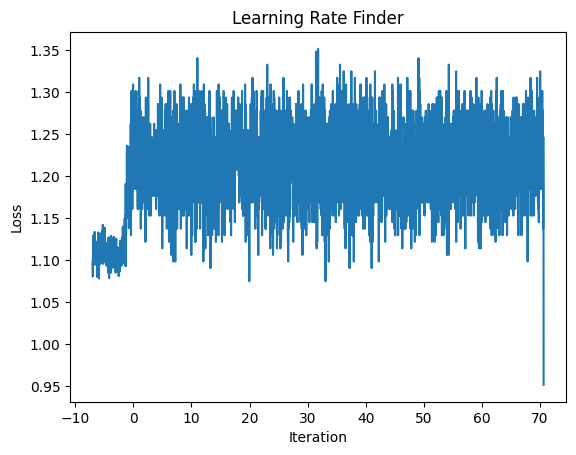

In [122]:
import matplotlib.pyplot as plt 
plt.plot(log_lrs, losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Rate Finder')
plt.show()

In [129]:
math.log10(-1)

ValueError: math domain error

### Sem Fourier

In [126]:
import math

lrs = []
for lr in log_lrs:
    if lr > 0:
        lrs.append(math.log10(lr))

In [119]:
lrs

[-1.8646131412461038,
 -1.4578309752178644,
 -1.2515282985032574,
 -1.1122370815163471,
 -1.0069378716703796,
 -0.9222525255350779,
 -0.8514165108066893,
 -0.7905303323532206,
 -0.7371400004962164,
 -0.6896005277313332,
 -0.6467552761037594,
 -0.6077599433883797,
 -0.5719793351003387,
 -0.5389235470786153,
 -0.5082067770951068,
 -0.47951977105591026,
 -0.45261082234828914,
 -0.42727232368398355,
 -0.40333103138665416,
 -0.3806408763955414,
 -0.35907756215467795,
 -0.33853444155916473,
 -0.3189193259200089,
 -0.3001519840256547,
 -0.2821621596113391,
 -0.2648879834030811,
 -0.2482746890961745,
 -0.2322735660266937,
 -0.2168410980347567,
 -0.20193825015868344,
 -0.18752987371457505,
 -0.17358420693911436,
 -0.16007245334690962,
 -0.14696842372584784,
 -0.13424823058160978,
 -0.12189002607240623,
 -0.10987377621103034,
 -0.09818106547322424,
 -0.08679492702747293,
 -0.07569969465739948,
 -0.0648808731333184,
 -0.054325024341554125,
 -0.04401966692734127,
 -0.033953187571375554,
 -0.024114

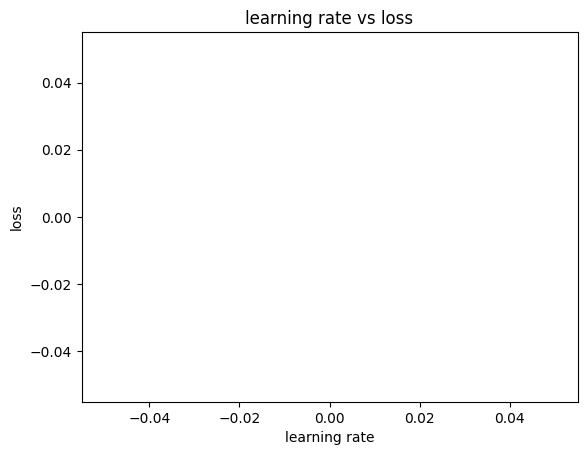

In [76]:
import matplotlib.pyplot as plt 
logs,losses= find_lr(model= Torch.Cnn, loss_fn= Torch.loss_fn, optimizer= Torch.optimizer)
plt.plot(logs,losses)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')
plt.show()
# train the model

In [61]:
losses

[tensor(1.0827, dtype=torch.float64, grad_fn=<NllLossBackward0>)]

In [17]:
find_lr(model= Torch.Cnn, loss_fn= Torch.loss_fn, optimizer= Torch.optimizer)

([], [])

In [20]:
import torch.optim  as optim


optimizer = optim.Adam([
{ 'params': Torch.Cnn.parameters(), 'lr': 0.0125},
], lr=0.125)

In [29]:
optimizer.param_groups[0]["lr"]

0.0125

In [11]:
%%time
data = DATA_1M(seconds=40,columns=20000, jump_time =0, n_jumps=1)
print(data)
data_fourier = data(Fourier=True)
data_fourier.shape

Numero de linhas 100000000 equivalente a 40 segundos
 Pulando em 0 segundos , em 1 vezes
Tamanho da memoria ocupada :4577.87 MB
CPU times: total: 14min 1s
Wall time: 34min 29s


(30000, 20001)

In [12]:
data.Spliting(data= data_fourier, random_state= 38, test_size = 0.275, shuffle = True, inplace= False)


X_train shape: (21750, 20000) float64
X_Test shape: (8250, 20000) float64
y_train shape: (21750,) float64
y_test shape: (8250,) float64

--------
Valor 0: 10000 ocorrência(s)- 0.33%
Valor 1: 10000 ocorrência(s)- 0.33%
Valor 2: 10000 ocorrência(s)- 0.33%
Dataset :  (30000, 20001)


In [13]:
train_dataloader , test_dataloader = data.DataLoaders(batch_size=64, inplace=True)

X shape , Y shape torch.Size([64, 20000]) torch.Size([64])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001E0EE4EFFD0>, <torch.utils.data.dataloader.DataLoader object at 0x000001E0EE1D94D0>)
Length of train dataloader: 340 batches of 64
Length of test dataloader: 129 batches of 64


In [14]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.34507 | Train accuracy: 38.98%


  7%|▋         | 1/15 [13:47<3:13:01, 827.28s/it]

Test loss: 84.69437 | Test accuracy: 41.67%
 Epoch: 1
---------
Train loss: 1.23940 | Train accuracy: 48.65%


 13%|█▎        | 2/15 [27:15<2:56:50, 816.17s/it]

Test loss: 90.13758 | Test accuracy: 30.20%
 Epoch: 2
---------
Train loss: 1.08449 | Train accuracy: 65.32%


 20%|██        | 3/15 [41:02<2:44:14, 821.21s/it]

Test loss: 85.79268 | Test accuracy: 40.52%
 Epoch: 3
---------
Train loss: 0.99929 | Train accuracy: 74.36%


 27%|██▋       | 4/15 [54:35<2:29:58, 818.00s/it]

Test loss: 86.04421 | Test accuracy: 39.24%
 Epoch: 4
---------
Train loss: 0.95456 | Train accuracy: 79.09%


 33%|███▎      | 5/15 [1:08:34<2:17:34, 825.40s/it]

Test loss: 86.70774 | Test accuracy: 38.63%
 Epoch: 5
---------
Train loss: 0.92030 | Train accuracy: 82.59%


 40%|████      | 6/15 [1:22:22<2:03:55, 826.15s/it]

Test loss: 86.27540 | Test accuracy: 39.31%
 Epoch: 6
---------
Train loss: 0.88564 | Train accuracy: 85.98%


 47%|████▋     | 7/15 [1:35:11<1:47:41, 807.73s/it]

Test loss: 86.88641 | Test accuracy: 38.86%
 Epoch: 7
---------
Train loss: 0.85450 | Train accuracy: 89.21%


 53%|█████▎    | 8/15 [1:48:31<1:33:56, 805.18s/it]

Test loss: 87.64834 | Test accuracy: 37.73%
 Epoch: 8
---------
Train loss: 0.83719 | Train accuracy: 90.87%


 60%|██████    | 9/15 [2:02:30<1:21:34, 815.70s/it]

Test loss: 87.55235 | Test accuracy: 38.43%
 Epoch: 9
---------
Train loss: 0.82399 | Train accuracy: 92.23%


 67%|██████▋   | 10/15 [2:16:19<1:08:19, 819.91s/it]

Test loss: 87.34147 | Test accuracy: 38.42%
 Epoch: 10
---------
Train loss: 0.81576 | Train accuracy: 92.98%


 73%|███████▎  | 11/15 [2:30:09<54:51, 822.98s/it]  

Test loss: 87.66981 | Test accuracy: 38.00%
 Epoch: 11
---------
Train loss: 0.81025 | Train accuracy: 93.51%


 80%|████████  | 12/15 [2:43:41<40:58, 819.64s/it]

Test loss: 87.86864 | Test accuracy: 37.72%
 Epoch: 12
---------
Train loss: 0.80280 | Train accuracy: 94.27%


 87%|████████▋ | 13/15 [2:57:12<27:13, 816.83s/it]

Test loss: 87.00118 | Test accuracy: 39.11%
 Epoch: 13
---------
Train loss: 0.79937 | Train accuracy: 94.61%


 93%|█████████▎| 14/15 [3:10:39<13:34, 814.03s/it]

Test loss: 86.97332 | Test accuracy: 39.22%
 Epoch: 14
---------
Train loss: 0.79809 | Train accuracy: 94.72%


100%|██████████| 15/15 [3:24:08<00:00, 816.55s/it]

Test loss: 87.60427 | Test accuracy: 38.22%
CPU times: total: 20h 14min 1s
Wall time: 3h 24min 8s


In [15]:
print(Torch(test= True, train= True))





    Test Accuracy  Test Loss   Train Accuracy  Train Loss
0       38.215467   87.604266       38.984375    1.345068
1       38.215467   87.604266       48.654684    1.239400
2       38.215467   87.604266       65.315564    1.084490
3       38.215467   87.604266       74.356447    0.999285
4       38.215467   87.604266       79.091605    0.954565
5       38.215467   87.604266       82.588848    0.920301
6       38.215467   87.604266       85.979541    0.885640
7       38.215467   87.604266       89.214495    0.854497
8       38.215467   87.604266       90.866353    0.837193
9       38.215467   87.604266       92.227158    0.823987
10      38.215467   87.604266       92.979133    0.815760
11      38.215467   87.604266       93.506774    0.810251
12      38.215467   87.604266       94.273046    0.802804
13      38.215467   87.604266       94.605971    0.799371
14      38.215467   87.604266       94.717967    0.798092


In [16]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data.y_test, Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.39      0.55      0.45      2716
        WIFI       0.41      0.34      0.37      2809
         LTE       0.35      0.25      0.29      2725

    accuracy                           0.38      8250
   macro avg       0.38      0.38      0.37      8250
weighted avg       0.38      0.38      0.37      8250

